# Dataset from: 
https://www.basketball-reference.com/leagues/NBA_2023_games-march.html

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import webbrowser
from bs4 import BeautifulSoup
import requests
import random
from statsmodels.formula.api import ols
import seaborn as sns
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
def search_month(month_value):
    display(f'Creating a link for the month of {month_value.capitalize()}')
    url = f'https://www.basketball-reference.com/leagues/NBA_2023_games-{month_value.lower()}.html'
    display(f'Click to go  {url},' f' showing the month of {month_value.capitalize()} of the 2022-23 NBA Season')
    return url


def find_dates(data, lookfor1, lookfor2):
    new_dates = data.find_all(lookfor1, class_=lookfor2)
    df = pd.DataFrame([date.text for date in new_dates])
    df = df[0].str.split(',', expand=True)
    columns = ['weekday','date','year']
    df.columns = columns
    return df


def create_df(value, num_of_elements):
    num_rows = len(value) // num_of_elements
    rows = []
    for i in range(num_rows):
        row = value[i * num_of_elements: (i + 1) * num_of_elements]
        rows.append(row)
    df = pd.DataFrame(rows)
    return df


def update_column_names(df, column, new_name):
    df.rename(columns={column: new_name}, inplace=True)
    return df


def change_data_type(df, column, new_type):
    df[column] = df[column].astype(new_type)
    return df


def column_names(data):
    df = pd.DataFrame([title.text for title in data])
    df = df[0].str.split('\n', expand=True)
    list_names = list(df.iloc[0].str.lower())
    return list_names


def create_data_as_list(dataset):
    new_data = dataset.find_all('td')
    new_data = [data.text for data in new_data]
    new_data_as_list = list(new_data)
    return new_data_as_list


def run_get_request(url):
    website = webbrowser.open(url)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html')
    dataset = soup.find('div', class_ = 'table_wrapper')
    return dataset


def change_for_machine_learning(df):
    for column in df.columns:
        if not df[column].dtype == int:
            df[column] = df[column].astype('category')
            df[column] = df[column].cat.codes
    return df


def new_maps(df1, value1, df2, value2):
    codes = df1[value1].unique()
    names = df2[value2].unique()
    code_name_map = dict(zip(codes, names))
    return code_name_map


def search(value, place):
    results = full_data[full_data[place].str.contains(value, case=False)]
    display(f"Selected team(s): {results[place].unique().astype('str')}")
    if len(results) == 0:
        raise ValueError("No team IDs found. Please choose from the list above.")
    else:
        results=results
    random_team = random.choice(codes)
    random_team_2 = random.choice(codes)
    home_team_select = search(names[random_team], 'home/neutral')
    away_team_select = search(names[random_team_2], 'visitor/neutral')
    return results


def create_datetime (data, column1, column2, column3):
    date_times = data[column1] + data[column2] + ' ' + data[column3]
    pd.to_datetime(date_times)
    return date_times


def int_values(df, column_name):
    df[column_name] = abs(df[column_name].round().astype(int))
    return df


def find_winner(dataset, column1, column2):
    winner = []
    for lab, row in dataset.iterrows():
        matchup = [row['visitor'], row['home']]
        random_winner_for_OT = random.choice(matchup)
        if row[column1] > row[column2]:
            winner.append(row['visitor'])
        elif row[column1] == row[column2]:
            winner.append(f"Overtime! {random_winner_for_OT} win!")
        else:
            winner.append(row['home'])
    return winner


def new_dataframe(column, data):
    return pd.DataFrame({column : data})


def clear_shared_arena(data, column, team1):
    if data['home'] == team1:
        data[column] = df[column].replace({'Crypto.com Arena': 'Crypto.com Arena (LAL)'})
    else:
        data[column] = df[column].replace({'Crypto.com Arena': 'Crypto.com Arena (LAC)'})
    return data
    

def predictions():
    visitor_teams_random = random.sample(range(30), 15)
    home_teams_random = random.sample(range(30), 15)
    home_teams, visitor_teams, arena = [], [], []
    for i in range(15):
        while visitor_teams_random[i] == home_teams_random[i] and True:
            visitor_teams_random[i] = random.randint(0, 29)
            home_teams_random[i] = random.randint(0, 29)    
 
        home_teams.append(team_map[home_teams_random[i]])

        visitor_teams.append(team_map[visitor_teams_random[i]])
        
        arena.append(home_arena[home_teams_random[i]])
    
    v_teams = new_dataframe("visitor", visitor_teams)   
    visitor_scores = pd.DataFrame(prediction_data_away['visitor_pts'].iloc[visitor_teams_random]).reset_index().drop('index', axis=1)
    
    h_teams = new_dataframe("home", home_teams)
    home_scores = pd.DataFrame(prediction_data_home['home_pts'].iloc[home_teams_random]).reset_index().drop('index', axis=1)
    
    arena_df = new_dataframe("arena", arena)
    
    visitor_teams_scores = pd.concat([v_teams, visitor_scores], axis=1)
    home_teams_scores = pd.concat([h_teams, home_scores], axis=1)
    predictions = pd.concat([visitor_teams_scores, home_teams_scores], axis=1)
    predictions = pd.concat([predictions, arena_df], axis=1)
    predictions = pd.concat([predictions], axis=1)
    predictions['Projected Winner'] = find_winner(predictions, 'visitor_pts', 'home_pts')
    return predictions

In [ ]:
months_of_season = pd.DataFrame({'months' : ['october', 'november', 'december', 'january', 'february', 'march', 'april', 'may', 'june']})
dataset = run_get_request(search_month(months_of_season['months'].iloc[5]))
type(dataset)

'Creating a link for the month of March'

'Click to go  https://www.basketball-reference.com/leagues/NBA_2023_games-march.html, showing the month of March of the 2022-23 NBA Season'

bs4.element.Tag

In [ ]:
dataset

<div class="table_wrapper" id="all_schedule">
<div class="section_heading assoc_schedule" id="schedule_sh">
<span class="section_anchor" data-label="March Schedule" id="schedule_link"></span><h2>March Schedule</h2> <div class="section_heading_text">
<ul>
</ul>
</div>
</div>
<div class="table_container" id="div_schedule">
<table class="suppress_glossary sortable stats_table" data-cols-to-freeze=",1" id="schedule">
<caption>March Schedule Table</caption>
<colgroup><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/><col/></colgroup>
<thead>
<tr>
<th aria-label="Date" class="poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>
<th aria-label="Start (ET)" class="poptip center" data-stat="game_start_time" scope="col">Start (ET)</th>
<th aria-label="Visitor/Neutral" class="poptip sort_default_asc center" data-stat="visitor_team_name" scope="col">Visitor/Neutral</th>
<th aria-label="Visitor Points" class="poptip center" data-stat="visitor_pts" data-tip="Points" 

In [ ]:
headers = dataset.find_all('thead')
headers

[<thead>
 <tr>
 <th aria-label="Date" class="poptip sort_default_asc center" data-stat="date_game" scope="col">Date</th>
 <th aria-label="Start (ET)" class="poptip center" data-stat="game_start_time" scope="col">Start (ET)</th>
 <th aria-label="Visitor/Neutral" class="poptip sort_default_asc center" data-stat="visitor_team_name" scope="col">Visitor/Neutral</th>
 <th aria-label="Visitor Points" class="poptip center" data-stat="visitor_pts" data-tip="Points" scope="col">PTS</th>
 <th aria-label="Home/Neutral" class="poptip sort_default_asc center" data-stat="home_team_name" scope="col">Home/Neutral</th>
 <th aria-label="Home Points" class="poptip center" data-stat="home_pts" scope="col">PTS</th>
 <th aria-label=" " class="poptip sort_default_asc center" data-stat="box_score_text" scope="col"> </th>
 <th aria-label=" " class="poptip center" data-stat="overtimes" scope="col"> </th>
 <th aria-label="Attend." class="poptip center" data-stat="attendance" scope="col">Attend.</th>
 <th aria-lab

In [ ]:
game_dates = find_dates(dataset, 'th', 'left')
game_dates.drop_duplicates()

,weekday,date,year
0,Wed,Mar 1,2023
9,Thu,Mar 2,2023
13,Fri,Mar 3,2023
23,Sat,Mar 4,2023
29,Sun,Mar 5,2023
39,Mon,Mar 6,2023
45,Tue,Mar 7,2023
53,Wed,Mar 8,2023
60,Thu,Mar 9,2023
66,Fri,Mar 10,2023


In [ ]:
columns = column_names(headers)
columns

['',
 '',
 'date',
 'start (et)',
 'visitor/neutral',
 'pts',
 'home/neutral',
 'pts',
 '\xa0',
 '\xa0',
 'attend.',
 'arena',
 'notes',
 '',
 '']

In [ ]:
clean_the_column_names = ['\xa0', 'notes', '', 'date']
columns = list(filter(lambda x: x not in clean_the_column_names, columns))
columns = ['start (et)', 'visitor/neutral', 'visitor_pts', 'home/neutral', 'home_pts', 'attendance', 'arena']

In [ ]:
data_for_new_df = create_data_as_list(dataset)
data_for_new_df

['7:00p',
 'Phoenix Suns',
 '105',
 'Charlotte Hornets',
 '91',
 'Box Score',
 '',
 '19,137',
 'Spectrum Center',
 '',
 '7:00p',
 'Chicago Bulls',
 '117',
 'Detroit Pistons',
 '115',
 'Box Score',
 '',
 '18,098',
 'Little Caesars Arena',
 '',
 '7:30p',
 'Cleveland Cavaliers',
 '113',
 'Boston Celtics',
 '117',
 'Box Score',
 '',
 '19,156',
 'TD Garden',
 '',
 '7:30p',
 'Philadelphia 76ers',
 '119',
 'Miami Heat',
 '96',
 'Box Score',
 '',
 '19,600',
 'Kaseya Center',
 '',
 '7:30p',
 'Brooklyn Nets',
 '118',
 'New York Knicks',
 '142',
 'Box Score',
 '',
 '19,812',
 'Madison Square Garden (IV)',
 '',
 '8:00p',
 'Memphis Grizzlies',
 '113',
 'Houston Rockets',
 '99',
 'Box Score',
 '',
 '15,919',
 'Toyota Center',
 '',
 '8:00p',
 'Orlando Magic',
 '117',
 'Milwaukee Bucks',
 '139',
 'Box Score',
 '',
 '17,354',
 'Fiserv Forum',
 '',
 '8:00p',
 'Los Angeles Lakers',
 '123',
 'Oklahoma City Thunder',
 '117',
 'Box Score',
 '',
 '17,114',
 'Paycom Center',
 '',
 '10:00p',
 'New Orleans Peli

In [ ]:
len(data_for_new_df)

2290

In [ ]:
null_spots = [i for i in range(len(data_for_new_df)) if data_for_new_df[i] == '']
len(null_spots)

448

In [ ]:
(len(data_for_new_df) - len(null_spots))

1842

In [ ]:
values_to_remove = ['', 'Box Score', 'OT', '2OT', '3OT']
data_for_new_df = list(filter(lambda x: x not in values_to_remove, data_for_new_df))
display(len(data_for_new_df))
data_for_new_df

1602

['7:00p',
 'Phoenix Suns',
 '105',
 'Charlotte Hornets',
 '91',
 '19,137',
 'Spectrum Center',
 '7:00p',
 'Chicago Bulls',
 '117',
 'Detroit Pistons',
 '115',
 '18,098',
 'Little Caesars Arena',
 '7:30p',
 'Cleveland Cavaliers',
 '113',
 'Boston Celtics',
 '117',
 '19,156',
 'TD Garden',
 '7:30p',
 'Philadelphia 76ers',
 '119',
 'Miami Heat',
 '96',
 '19,600',
 'Kaseya Center',
 '7:30p',
 'Brooklyn Nets',
 '118',
 'New York Knicks',
 '142',
 '19,812',
 'Madison Square Garden (IV)',
 '8:00p',
 'Memphis Grizzlies',
 '113',
 'Houston Rockets',
 '99',
 '15,919',
 'Toyota Center',
 '8:00p',
 'Orlando Magic',
 '117',
 'Milwaukee Bucks',
 '139',
 '17,354',
 'Fiserv Forum',
 '8:00p',
 'Los Angeles Lakers',
 '123',
 'Oklahoma City Thunder',
 '117',
 '17,114',
 'Paycom Center',
 '10:00p',
 'New Orleans Pelicans',
 '121',
 'Portland Trail Blazers',
 '110',
 '18,566',
 'Moda Center',
 '7:00p',
 'Toronto Raptors',
 '108',
 'Washington Wizards',
 '119',
 '14,643',
 'Capital One Arena',
 '7:30p',
 'P

In [ ]:
df = create_df(data_for_new_df, 7)
df

,0,1,2,3,4,5,6
0,7:00p,Phoenix Suns,105,Charlotte Hornets,91,"19,137",Spectrum Center
1,7:00p,Chicago Bulls,117,Detroit Pistons,115,"18,098",Little Caesars Arena
2,7:30p,Cleveland Cavaliers,113,Boston Celtics,117,"19,156",TD Garden
3,7:30p,Philadelphia 76ers,119,Miami Heat,96,"19,600",Kaseya Center
4,7:30p,Brooklyn Nets,118,New York Knicks,142,"19,812",Madison Square Garden (IV)
...,...,...,...,...,...,...,...
223,Detroit Pistons,115,Houston Rockets,121,"15,844",Toyota Center,8:00p
224,Los Angeles Clippers,94,Memphis Grizzlies,108,"16,376",FedEx Forum,8:00p
225,Los Angeles Lakers,123,Minnesota Timberwolves,111,"18,978",Target Center,10:00p
226,San Antonio Spurs,115,Golden State Warriors,130,"18,064",Chase Center,10:00p


In [ ]:
df[0].sort_values()

59                 10:00p
20                 10:00p
19                 10:00p
93                 10:00p
94                 10:00p
              ...        
218       Toronto Raptors
220             Utah Jazz
211             Utah Jazz
179             Utah Jazz
187    Washington Wizards
Name: 0, Length: 228, dtype: object

In [ ]:
search_df = ~df[0].str.contains('0p')
df.loc[search_df]

,0,1,2,3,4,5,6
160,Phoenix Suns,111,Los Angeles Lakers,122,"18,435",Crypto.com Arena,7:00p
161,New York Knicks,106,Orlando Magic,111,"17,607",Amway Center,7:30p
162,Cleveland Cavaliers,116,Brooklyn Nets,114,"17,732",Barclays Center,8:00p
163,Charlotte Hornets,96,New Orleans Pelicans,115,"15,749",Smoothie King Center,10:30p
164,Oklahoma City Thunder,105,Los Angeles Clippers,127,"17,307",Crypto.com Arena,7:00p
...,...,...,...,...,...,...,...
223,Detroit Pistons,115,Houston Rockets,121,"15,844",Toyota Center,8:00p
224,Los Angeles Clippers,94,Memphis Grizzlies,108,"16,376",FedEx Forum,8:00p
225,Los Angeles Lakers,123,Minnesota Timberwolves,111,"18,978",Target Center,10:00p
226,San Antonio Spurs,115,Golden State Warriors,130,"18,064",Chase Center,10:00p


In [ ]:
df.iloc[159, 6]

'10:00p'

In [ ]:
find_row_in_list = (159*7)
data_for_new_df[find_row_in_list:find_row_in_list + 7]

['9:00p',
 'Portland Trail Blazers',
 '127',
 'Utah Jazz',
 '115',
 'Vivint Arena',
 '10:00p']

In [ ]:
df[5] = df[5].str.replace(',', '')

In [ ]:
df.at[159, 5] = 18306
df.at[159, 6] = 'Vivint Arena'
df.iloc[159]

0                     9:00p
1    Portland Trail Blazers
2                       127
3                 Utah Jazz
4                       115
5                     18306
6              Vivint Arena
Name: 159, dtype: object

In [ ]:
display(data_for_new_df[find_row_in_list + 6])
data_for_new_df.insert(find_row_in_list, df.at[159, 5])

'10:00p'

In [ ]:
df = create_df(data_for_new_df, 7)
df.columns = columns
df.tail()

,start (et),visitor/neutral,visitor_pts,home/neutral,home_pts,attendance,arena
224,8:00p,Los Angeles Clippers,94,Memphis Grizzlies,108,"16,376",FedEx Forum
225,8:00p,Los Angeles Lakers,123,Minnesota Timberwolves,111,"18,978",Target Center
226,10:00p,San Antonio Spurs,115,Golden State Warriors,130,"18,064",Chase Center
227,10:00p,Sacramento Kings,138,Portland Trail Blazers,114,"18,389",Moda Center
228,10:30p,Denver Nuggets,93,Phoenix Suns,100,"17,071",Footprint Center


In [ ]:
len(df), len(game_dates)

(229, 229)

In [ ]:
full_data = pd.concat([game_dates, df], axis=1)
full_data.tail()

,weekday,date,year,start (et),visitor/neutral,visitor_pts,home/neutral,home_pts,attendance,arena
224,Fri,Mar 31,2023,8:00p,Los Angeles Clippers,94,Memphis Grizzlies,108,"16,376",FedEx Forum
225,Fri,Mar 31,2023,8:00p,Los Angeles Lakers,123,Minnesota Timberwolves,111,"18,978",Target Center
226,Fri,Mar 31,2023,10:00p,San Antonio Spurs,115,Golden State Warriors,130,"18,064",Chase Center
227,Fri,Mar 31,2023,10:00p,Sacramento Kings,138,Portland Trail Blazers,114,"18,389",Moda Center
228,Fri,Mar 31,2023,10:30p,Denver Nuggets,93,Phoenix Suns,100,"17,071",Footprint Center


In [ ]:
sorted(full_data.visitor_pts, reverse=True)

['Portland Trail Blazers',
 '99',
 '99',
 '99',
 '99',
 '97',
 '97',
 '97',
 '97',
 '96',
 '95',
 '95',
 '94',
 '94',
 '94',
 '93',
 '93',
 '93',
 '93',
 '92',
 '92',
 '91',
 '91',
 '90',
 '86',
 '84',
 '149',
 '147',
 '144',
 '141',
 '141',
 '140',
 '140',
 '139',
 '138',
 '138',
 '137',
 '137',
 '136',
 '134',
 '134',
 '133',
 '133',
 '132',
 '132',
 '131',
 '131',
 '131',
 '131',
 '130',
 '130',
 '130',
 '129',
 '129',
 '128',
 '128',
 '128',
 '128',
 '127',
 '127',
 '127',
 '127',
 '126',
 '126',
 '126',
 '126',
 '126',
 '125',
 '125',
 '125',
 '125',
 '124',
 '124',
 '124',
 '124',
 '124',
 '123',
 '123',
 '123',
 '123',
 '123',
 '122',
 '122',
 '122',
 '122',
 '122',
 '121',
 '121',
 '121',
 '121',
 '121',
 '121',
 '120',
 '120',
 '120',
 '120',
 '120',
 '120',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '119',
 '118',
 '118',
 '118',
 '118',
 '118',
 '118',
 '118',
 '118',
 '118',
 '117',
 '117',
 '117',
 '117',
 '117',
 '117',
 '117',
 '117'

In [ ]:
needs_update_loc = full_data[full_data.visitor_pts == 'Portland Trail Blazers'].index
needs_update= full_data.iloc[needs_update_loc]
needs_update

,weekday,date,year,start (et),visitor/neutral,visitor_pts,home/neutral,home_pts,attendance,arena
159,Wed,Mar 22,2023,18306,9:00p,Portland Trail Blazers,127,Utah Jazz,115,Vivint Arena


In [ ]:
needs_update[['start (et)','visitor/neutral','visitor_pts','home/neutral','home_pts']] = needs_update[['visitor/neutral','visitor_pts','home/neutral','home_pts','attendance']]
needs_update[['attendance']] = '18,306'
needs_update

/tmp/ipykernel_21/243511016.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needs_update[['start (et)','visitor/neutral','visitor_pts','home/neutral','home_pts']] = needs_update[['visitor/neutral','visitor_pts','home/neutral','home_pts','attendance']]
/tmp/ipykernel_21/243511016.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  needs_update[['attendance']] = '18,306'


,weekday,date,year,start (et),visitor/neutral,visitor_pts,home/neutral,home_pts,attendance,arena
159,Wed,Mar 22,2023,9:00p,Portland Trail Blazers,127,Utah Jazz,115,"18,306",Vivint Arena


In [ ]:
full_data.iloc[needs_update_loc] = needs_update

In [ ]:
full_data.iloc[needs_update_loc]

,weekday,date,year,start (et),visitor/neutral,visitor_pts,home/neutral,home_pts,attendance,arena
159,Wed,Mar 22,2023,9:00p,Portland Trail Blazers,127,Utah Jazz,115,"18,306",Vivint Arena


In [ ]:
display(full_data.visitor_pts.dtype)
full_data.info()

dtype('O')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   weekday          229 non-null    object
 1   date             229 non-null    object
 2   year             229 non-null    object
 3   start (et)       229 non-null    object
 4   visitor/neutral  229 non-null    object
 5   visitor_pts      229 non-null    object
 6   home/neutral     229 non-null    object
 7   home_pts         229 non-null    object
 8   attendance       229 non-null    object
 9   arena            229 non-null    object
dtypes: object(10)
memory usage: 18.0+ KB


In [ ]:
full_data = update_column_names(full_data, 'visitor/neutral', 'visitor')
full_data = update_column_names(full_data, 'start (et)', 'start_time')
full_data = update_column_names(full_data, 'home/neutral', 'home')
full_data.attendance = full_data.attendance.str.replace(',', '')
full_data['start_time'] = full_data['start_time'].str.replace('p', '')
full_data = change_data_type(full_data, 'attendance', 'int')
full_data = change_data_type(full_data, 'home_pts', 'int')
full_data = change_data_type(full_data, 'visitor_pts', 'int')
full_data = change_data_type(full_data, 'attendance', 'int')
full_data = change_data_type(full_data, 'weekday', 'category')
full_data = change_data_type(full_data, 'visitor', 'string')
full_data = change_data_type(full_data, 'home', 'string')
full_data['calendar_info'] = create_datetime(full_data, 'year', 'date', 'start_time')
full_data['arena'] = full_data.apply(update_arena, axis=1)
full_data.columns

Index(['weekday', 'date', 'year', 'start_time', 'visitor', 'visitor_pts',
       'home', 'home_pts', 'attendance', 'arena', 'calendar_info'],
      dtype='object')

In [ ]:
game_winner = find_winner(full_data, 'visitor_pts', 'home_pts')
full_data['winner'] = game_winner
full_data.tail()

,weekday,date,year,start_time,visitor,visitor_pts,home,home_pts,attendance,arena,calendar_info,winner
224,Fri,Mar 31,2023,8:00,Los Angeles Clippers,94,Memphis Grizzlies,108,16376,FedEx Forum,2023 Mar 31 8:00,Memphis Grizzlies
225,Fri,Mar 31,2023,8:00,Los Angeles Lakers,123,Minnesota Timberwolves,111,18978,Target Center,2023 Mar 31 8:00,Los Angeles Lakers
226,Fri,Mar 31,2023,10:00,San Antonio Spurs,115,Golden State Warriors,130,18064,Chase Center,2023 Mar 31 10:00,Golden State Warriors
227,Fri,Mar 31,2023,10:00,Sacramento Kings,138,Portland Trail Blazers,114,18389,Moda Center,2023 Mar 31 10:00,Sacramento Kings
228,Fri,Mar 31,2023,10:30,Denver Nuggets,93,Phoenix Suns,100,17071,Footprint Center,2023 Mar 31 10:30,Phoenix Suns


In [ ]:
full_data = full_data.drop(['date', 'year', 'start_time'], axis=1)

In [ ]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 229 entries, 0 to 228
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   weekday        229 non-null    category
 1   visitor        229 non-null    string  
 2   visitor_pts    229 non-null    int64   
 3   home           229 non-null    string  
 4   home_pts       229 non-null    int64   
 5   attendance     229 non-null    int64   
 6   arena          229 non-null    object  
 7   calendar_info  229 non-null    object  
 8   winner         229 non-null    object  
dtypes: category(1), int64(3), object(3), string(2)
memory usage: 15.0+ KB


In [ ]:
full_data_cut = full_data.drop('calendar_info', axis=1)
full_data_cut.home.unique()

<StringArray>
[     'Charlotte Hornets',        'Detroit Pistons',         'Boston Celtics',
             'Miami Heat',        'New York Knicks',        'Houston Rockets',
        'Milwaukee Bucks',  'Oklahoma City Thunder', 'Portland Trail Blazers',
     'Washington Wizards',       'Dallas Mavericks',      'San Antonio Spurs',
  'Golden State Warriors',          'Atlanta Hawks',          'Chicago Bulls',
         'Denver Nuggets',       'Sacramento Kings',     'Los Angeles Lakers',
    'Cleveland Cavaliers',          'Brooklyn Nets',          'Orlando Magic',
   'Los Angeles Clippers',         'Indiana Pacers', 'Minnesota Timberwolves',
   'New Orleans Pelicans',           'Phoenix Suns',      'Memphis Grizzlies',
     'Philadelphia 76ers',        'Toronto Raptors',              'Utah Jazz']
Length: 30, dtype: string

In [ ]:
data_for_predict = change_for_machine_learning(full_data)
data_for_predict.tail()

,weekday,visitor,visitor_pts,home,home_pts,attendance,arena,calendar_info,winner
224,0,12,94,14,108,16376,8,115,14
225,0,13,123,17,111,18978,24,115,13
226,0,26,115,9,130,18064,6,111,9
227,0,25,138,24,114,18389,16,111,25
228,0,7,93,23,100,17071,10,112,23


In [ ]:
team_map = new_maps(data_for_predict, 'home', full_data_cut, 'home')
team_map

{3: 'Charlotte Hornets',
 8: 'Detroit Pistons',
 1: 'Boston Celtics',
 15: 'Miami Heat',
 19: 'New York Knicks',
 10: 'Houston Rockets',
 16: 'Milwaukee Bucks',
 20: 'Oklahoma City Thunder',
 24: 'Portland Trail Blazers',
 29: 'Washington Wizards',
 6: 'Dallas Mavericks',
 26: 'San Antonio Spurs',
 9: 'Golden State Warriors',
 0: 'Atlanta Hawks',
 4: 'Chicago Bulls',
 7: 'Denver Nuggets',
 25: 'Sacramento Kings',
 13: 'Los Angeles Lakers',
 5: 'Cleveland Cavaliers',
 2: 'Brooklyn Nets',
 21: 'Orlando Magic',
 12: 'Los Angeles Clippers',
 11: 'Indiana Pacers',
 17: 'Minnesota Timberwolves',
 18: 'New Orleans Pelicans',
 23: 'Phoenix Suns',
 14: 'Memphis Grizzlies',
 22: 'Philadelphia 76ers',
 27: 'Toronto Raptors',
 28: 'Utah Jazz'}

In [ ]:
home_arena = new_maps(data_for_predict, 'home', full_data, 'arena')
home_arena

In [ ]:
data_for_predict_pop = data_for_predict.sample(frac=1/5, random_state=2)
data_for_predict_pop.tail()

,weekday,visitor,visitor_pts,home,home_pts,attendance,arena,calendar_info,winner
29,3,23,130,6,126,20311,1,122,23
206,6,15,92,19,101,19812,15,102,19
18,0,28,103,20,130,16538,17,108,20
153,6,19,120,15,127,19863,13,66,15
5,6,14,113,10,99,15919,25,3,14


In [ ]:
data_for_predict_pop.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46 entries, 214 to 5
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   weekday        46 non-null     int8 
 1   visitor        46 non-null     int8 
 2   visitor_pts    46 non-null     int64
 3   home           46 non-null     int8 
 4   home_pts       46 non-null     int64
 5   attendance     46 non-null     int64
 6   arena          46 non-null     int8 
 7   calendar_info  46 non-null     int16
 8   winner         46 non-null     int8 
dtypes: int16(1), int64(3), int8(5)
memory usage: 1.8 KB


In [ ]:
data_for_predict_pop.describe()

,weekday,visitor,visitor_pts,home,home_pts,attendance,arena,calendar_info,winner
count,46.000000,46.000000,46.000000,46.000000,46.00000,46.000000,46.000000,46.000000,46.000000
mean,3.173913,15.065217,115.500000,13.282609,117.00000,18222.173913,12.543478,74.891304,13.869565
std,2.121890,8.314384,14.599467,8.565209,12.89789,1690.911658,7.850567,43.962726,7.982227
min,0.000000,0.000000,90.000000,0.000000,88.00000,14778.000000,0.000000,3.000000,0.000000
25%,1.250000,10.000000,107.250000,6.000000,109.00000,17071.750000,6.000000,33.500000,6.750000
50%,3.000000,16.500000,115.500000,12.500000,118.50000,18066.000000,12.000000,78.000000,14.000000
75%,5.000000,22.000000,123.500000,20.000000,126.75000,19660.000000,17.750000,114.500000,20.000000
max,6.000000,28.000000,149.000000,29.000000,143.00000,21225.000000,28.000000,140.000000,29.000000


In [ ]:
visit_pts_model = ols('visitor_pts ~  visitor', data=data_for_predict_pop)
visit_pts_model = visit_pts_model.fit()

home_pts_model = ols('home_pts ~ home', data=data_for_predict_pop)
home_pts_model = home_pts_model.fit()

visit_pts_model.params, home_pts_model.params

(Intercept    116.761567
 visitor       -0.083740
 dtype: float64,
 Intercept    112.099479
 home           0.368943
 dtype: float64)

In [ ]:
explanatory_data_away = pd.DataFrame({'visitor': np.arange(0 , 30)})
explanatory_data_home = pd.DataFrame({'home': np.arange(0 , 30)})

In [ ]:
prediction_data_home = explanatory_data_home.assign(home_pts = home_pts_model.predict(explanatory_data_home))
prediction_data_home = int_values(prediction_data_home, 'home_pts')
prediction_data_away = explanatory_data_away.assign(visitor_pts = visit_pts_model.predict(explanatory_data_away))
prediction_data_away = int_values(prediction_data_away, 'visitor_pts')

In [ ]:
prediction_data_away.tail()

,visitor,visitor_pts
25,25,115
26,26,115
27,27,115
28,28,114
29,29,114


In [ ]:
prediction_data_home.tail()

,home,home_pts
25,25,121
26,26,122
27,27,122
28,28,122
29,29,123


<Figure size 640x480 with 0 Axes>

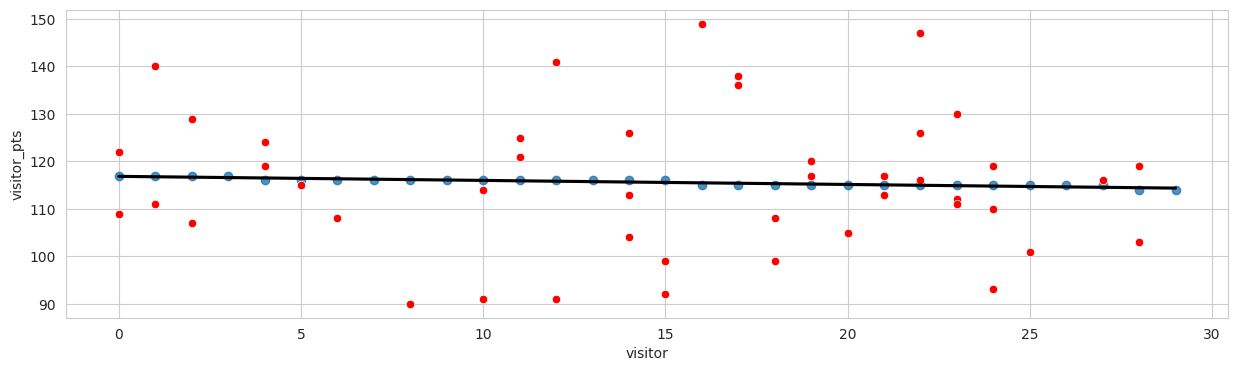

In [ ]:
fig = plt.figure()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')

sns.regplot(x="visitor",  y="visitor_pts", data=prediction_data_away, ci=0.95, line_kws={"color": "black"})

sns.scatterplot(x="visitor",  y="visitor_pts",  data=data_for_predict_pop, color='red')
plt.show()

<Figure size 640x480 with 0 Axes>

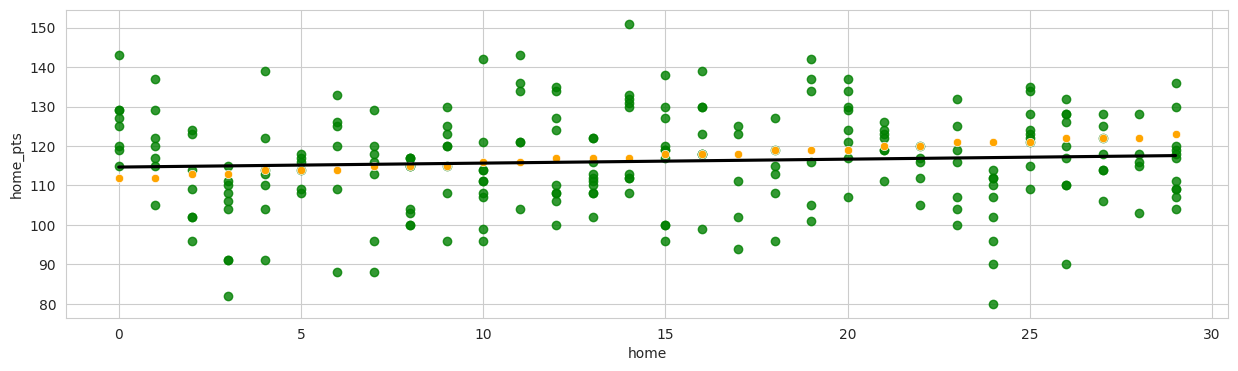

In [ ]:
fig = plt.figure()
plt.figure(figsize=(15, 4))
sns.set_style('whitegrid')
sns.regplot(x="home",  y="home_pts", data=data_for_predict, ci=0.95, color='green', line_kws={"color": "black"})

sns.scatterplot(x="home",  y="home_pts",  data=prediction_data_home, color='orange')
plt.show()

In [ ]:
predictions()

,visitor,visitor_pts,home,home_pts,Projected Winner
0,Atlanta Hawks,117,New Orleans Pelicans,119,New Orleans Pelicans
1,Indiana Pacers,116,Chicago Bulls,114,Indiana Pacers
2,Phoenix Suns,115,Orlando Magic,120,Orlando Magic
3,Boston Celtics,117,Denver Nuggets,115,Boston Celtics
4,Toronto Raptors,115,Boston Celtics,112,Toronto Raptors
5,Orlando Magic,115,Los Angeles Clippers,117,Los Angeles Clippers
6,Philadelphia 76ers,115,Brooklyn Nets,113,Philadelphia 76ers
7,Los Angeles Clippers,116,Philadelphia 76ers,120,Philadelphia 76ers
8,Denver Nuggets,116,Phoenix Suns,121,Phoenix Suns
9,San Antonio Spurs,115,Dallas Mavericks,114,San Antonio Spurs
